## Data Cleaning and Exploratory for Data Analysis for NYC Restuarant Ratings

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# Recreate dataset for analysis


In [6]:
file_path_cleaned = '/Users/empressb/Downloads/NYC_Restaurant_Inspections_Cleaned.csv'
data_cleaned = pd.read_csv(file_path_cleaned)



In [7]:
data_cleaned

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Cuisine_Borough
0,50063462,COPA-CABANA GRILL,Queens,8026,ROOSEVELT AVE,11372.0,3474756956,Brazilian,2023-01-04,Violations were cited in the following area(s).,...,Cycle Inspection / Re-inspection,40.747458,-73.885474,404.0,25.0,26901.0,4036845.0,4.014910e+09,QN29,Brazilian - Queens
1,50084972,JOE'S PIZZA,Brooklyn,483,5 AVENUE,11215.0,7183692634,Pizza,2025-01-14,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.667732,-73.987484,306.0,39.0,13900.0,3022924.0,3.010230e+09,BK37,Pizza - Brooklyn
2,50060048,CAFE BELLE,Manhattan,280,MULBERRY STREET,10012.0,2128371605,Coffee/Tea,2022-09-16,No violations were recorded at the time of thi...,...,Inter-Agency Task Force / Initial Inspection,40.724404,-73.995169,102.0,1.0,4300.0,1007916.0,1.005090e+09,MN24,Coffee/Tea - Manhattan
3,50163002,BHOJAN,Queens,1819,PALMETTO STREET,11385.0,7185763200,Unknown,1900-01-01,NaN,...,NaN,40.703188,-73.907306,405.0,34.0,54900.0,4082560.0,4.034550e+09,QN20,Unknown - Queens
4,50090741,SPRINGBONE,Manhattan,20,UNION SQUARE WEST,10003.0,2126777818,Pizza,2022-06-07,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.736610,-73.990679,105.0,2.0,5200.0,1016108.0,1.008450e+09,MN13,Pizza - Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269181,50130717,LAS MANOS QUIETAS 43,Queens,4313,BROADWAY,11103.0,6316636936,Latin American,2025-01-09,Violations were cited in the following area(s).,...,Cycle Inspection / Re-inspection,40.757758,-73.916409,401.0,26.0,15300.0,4011832.0,4.006930e+09,QN70,Latin American - Queens
269182,50088233,CAFE HESTIA,Manhattan,513,7 AVENUE,10018.0,2127683838,American,2023-12-20,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.753268,-73.988952,105.0,3.0,10900.0,1015263.0,1.008130e+09,MN17,American - Manhattan
269183,50042774,SLATE COFFEE + KITCHEN,Manhattan,121,MADISON AVENUE,10016.0,2126837800,American,2024-04-23,Violations were cited in the following area(s).,...,Cycle Inspection / Re-inspection,40.745398,-73.984662,105.0,2.0,7400.0,1016958.0,1.008600e+09,MN17,American - Manhattan
269184,50058240,ALOAF CAFE,Manhattan,170,EAST 110 STREET,10029.0,2128288896,Bakery Products/Desserts,2023-10-31,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.794390,-73.943457,111.0,8.0,17200.0,1052161.0,1.016370e+09,MN33,Bakery Products/Desserts - Manhattan


In [8]:
# Step 1: Fill missing grades with "Pending"
data_cleaned['GRADE'].fillna('Pending', inplace=True)



In [9]:
# Step 2: Analyze Missing Grades (now marked as "Pending")
# Count total inspections and "Pending" grades
total_inspections = data_cleaned.shape[0]
pending_count = data_cleaned[data_cleaned['GRADE'] == 'Pending'].shape[0]



In [10]:
pending_count

139969

In [11]:
# Calculate percentage of "Pending" grades
pending_percentage = (pending_count / total_inspections) * 100



In [12]:
pending_percentage

51.99713209453686

In [13]:
# Group by borough to see the distribution of "Pending" grades
pending_by_borough = data_cleaned[data_cleaned['GRADE'] == 'Pending'].groupby('BORO').size()



In [14]:
pending_by_borough

BORO
Bronx            12624
Brooklyn         38190
Manhattan        51259
Queens           33255
Staten Island     4641
dtype: int64

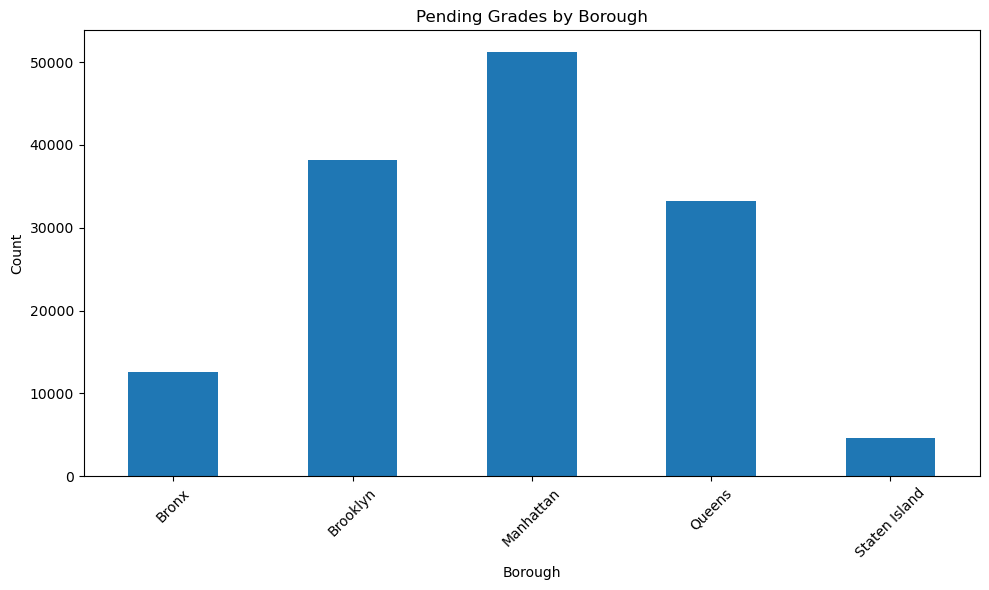

In [15]:
# Plot visualization
plt.figure(figsize=(10, 6))
pending_by_borough.plot(kind='bar', title="Pending Grades by Borough", ylabel="Count", xlabel="Borough")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
# Output pending statistics for reference
total_inspections, pending_count, pending_percentage

(269186, 139969, 51.99713209453686)

In [17]:
data_cleaned['GRADE']

0               A
1         Pending
2         Pending
3         Pending
4         Pending
           ...   
269181          A
269182          A
269183          A
269184    Pending
269185    Pending
Name: GRADE, Length: 269186, dtype: object

In [19]:
data_cleaned['GRADE']== 'Pending'

0         False
1          True
2          True
3          True
4          True
          ...  
269181    False
269182    False
269183    False
269184     True
269185     True
Name: GRADE, Length: 269186, dtype: bool

In [20]:
data_cleaned

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Cuisine_Borough
0,50063462,COPA-CABANA GRILL,Queens,8026,ROOSEVELT AVE,11372.0,3474756956,Brazilian,2023-01-04,Violations were cited in the following area(s).,...,Cycle Inspection / Re-inspection,40.747458,-73.885474,404.0,25.0,26901.0,4036845.0,4.014910e+09,QN29,Brazilian - Queens
1,50084972,JOE'S PIZZA,Brooklyn,483,5 AVENUE,11215.0,7183692634,Pizza,2025-01-14,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.667732,-73.987484,306.0,39.0,13900.0,3022924.0,3.010230e+09,BK37,Pizza - Brooklyn
2,50060048,CAFE BELLE,Manhattan,280,MULBERRY STREET,10012.0,2128371605,Coffee/Tea,2022-09-16,No violations were recorded at the time of thi...,...,Inter-Agency Task Force / Initial Inspection,40.724404,-73.995169,102.0,1.0,4300.0,1007916.0,1.005090e+09,MN24,Coffee/Tea - Manhattan
3,50163002,BHOJAN,Queens,1819,PALMETTO STREET,11385.0,7185763200,Unknown,1900-01-01,NaN,...,NaN,40.703188,-73.907306,405.0,34.0,54900.0,4082560.0,4.034550e+09,QN20,Unknown - Queens
4,50090741,SPRINGBONE,Manhattan,20,UNION SQUARE WEST,10003.0,2126777818,Pizza,2022-06-07,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.736610,-73.990679,105.0,2.0,5200.0,1016108.0,1.008450e+09,MN13,Pizza - Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269181,50130717,LAS MANOS QUIETAS 43,Queens,4313,BROADWAY,11103.0,6316636936,Latin American,2025-01-09,Violations were cited in the following area(s).,...,Cycle Inspection / Re-inspection,40.757758,-73.916409,401.0,26.0,15300.0,4011832.0,4.006930e+09,QN70,Latin American - Queens
269182,50088233,CAFE HESTIA,Manhattan,513,7 AVENUE,10018.0,2127683838,American,2023-12-20,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.753268,-73.988952,105.0,3.0,10900.0,1015263.0,1.008130e+09,MN17,American - Manhattan
269183,50042774,SLATE COFFEE + KITCHEN,Manhattan,121,MADISON AVENUE,10016.0,2126837800,American,2024-04-23,Violations were cited in the following area(s).,...,Cycle Inspection / Re-inspection,40.745398,-73.984662,105.0,2.0,7400.0,1016958.0,1.008600e+09,MN17,American - Manhattan
269184,50058240,ALOAF CAFE,Manhattan,170,EAST 110 STREET,10029.0,2128288896,Bakery Products/Desserts,2023-10-31,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.794390,-73.943457,111.0,8.0,17200.0,1052161.0,1.016370e+09,MN33,Bakery Products/Desserts - Manhattan


In [21]:
data_cleaned.to_csv('NYC_Resturant_Rating_clean.csv', index=False)